In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def linear(x, w):

    return np.dot(x,w)
    

In [3]:
def non_linear(x):
    return np.maximum(0,x)

In [16]:
w = np.random.rand(1,1)

In [17]:
w.shape

(1, 1)

In [21]:
X = np.linspace(-10,10).reshape(-1,1)

In [22]:
X.shape

(50, 1)

In [37]:
l1, l2, l3 = linear(X, np.random.rand(1,1)*10) + np.random.rand(1,1), linear(X, np.random.rand(1,1)*-10 +10) + np.random.rand(1,1), \
linear(X, np.random.rand(1,1)*5 +5) + np.random.rand(1,1) 

In [38]:
h1, h2, h3 = non_linear(l1), non_linear(l2), non_linear(l3)

In [41]:
o = linear(h1, np.random.rand(1,1)*0.01+1) + linear(h2, np.random.rand(1,1)*3 -4) + linear(h3, np.random.rand(1,1)*8 - 6) + np.random.rand(1,1)

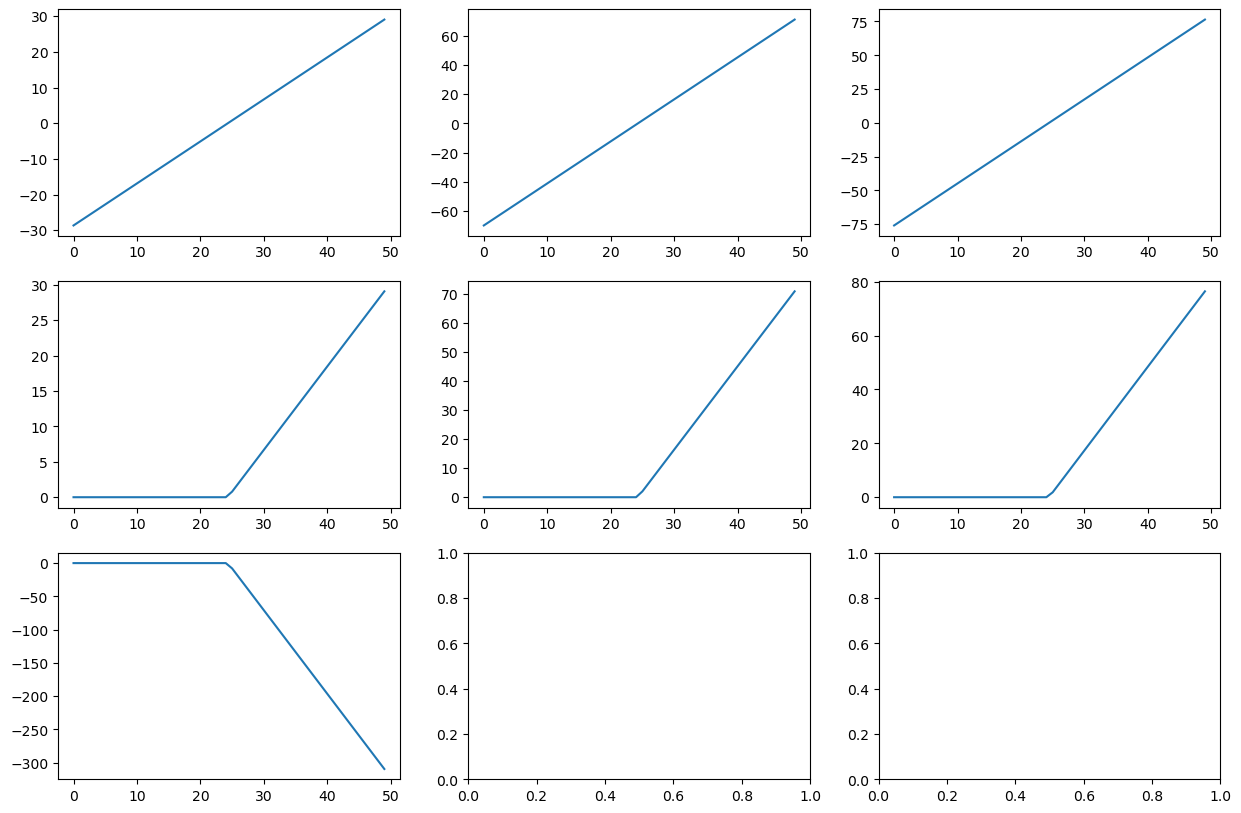

In [42]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

axs[0,0].plot(l1)
axs[0,1].plot(l2)
axs[0,2].plot(l3)

axs[1,0].plot(h1)
axs[1,1].plot(h2)
axs[1,2].plot(h3)

axs[2,0].plot(o)

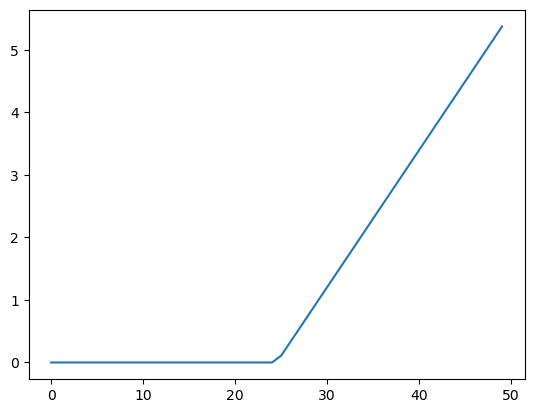

In [24]:
plt.plot(non_linear(linear(X, w)))

In [12]:
linear(X, w)

array([[5.43581227],
       [6.19469084],
       [6.45741807],
       [6.09530536],
       [6.97754148],
       [7.20580746],
       [6.33138336],
       [6.34936832],
       [7.10548241],
       [5.69703456],
       [6.11441404],
       [7.496332  ],
       [6.43897665],
       [5.51193951],
       [5.43627841],
       [5.21631395],
       [5.53494261],
       [6.16828324],
       [7.70559932],
       [6.38857428],
       [4.7688969 ],
       [6.38415239],
       [4.43583264],
       [6.13154502],
       [5.69134775],
       [6.67912765],
       [5.1785299 ],
       [6.40033841],
       [5.55726414],
       [5.81377911],
       [6.21578138],
       [4.80670661],
       [6.43260722],
       [7.03353059],
       [8.6719478 ],
       [5.2610086 ],
       [7.44202303],
       [5.52204817],
       [6.26384328],
       [6.65770172],
       [6.53720874],
       [5.94627706],
       [5.17469302],
       [7.11921968],
       [5.33931609],
       [6.83915677],
       [5.15825393],
       [6.293

In [6]:
import numpy as np

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
X = torch.linspace(-10,10, 500).reshape(-1,1)
y = torch.sin(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [22]:
batch_size = 16

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          drop_last=True)
test_loader = DataLoader(train_dataset, batch_size=test_dataset.tensors[0].shape[0])

In [16]:
class Model(nn.Module):

    def __init__(self):
        super().__init__()

        self.inp = nn.Linear(X.shape[1], 3)
        self.out = nn.Linear(3,1)


    def forward(self, x):

        x = F.relu(self.inp(x))
        x = self.out(x)

        return x

In [17]:
model = Model()

In [18]:
n_epochs, learning_rate = 100, 0.01

In [19]:
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_func = nn.MSELoss()

In [20]:
from tqdm.notebook import tqdm_notebook

In [24]:
losses = []

for epoch in tqdm_notebook(range(n_epochs)):

    batch_losses = []
    for (X_batch, y_batch) in train_loader:

        y_hat = model(X_batch)

        loss = loss_func(y_hat, y_batch)
        optim.zero_grad()
        loss.backward()
        optim.step()

        batch_losses.append(loss.detach())

    losses.append(np.mean(batch_losses))
        
    

  0%|          | 0/100 [00:00<?, ?it/s]

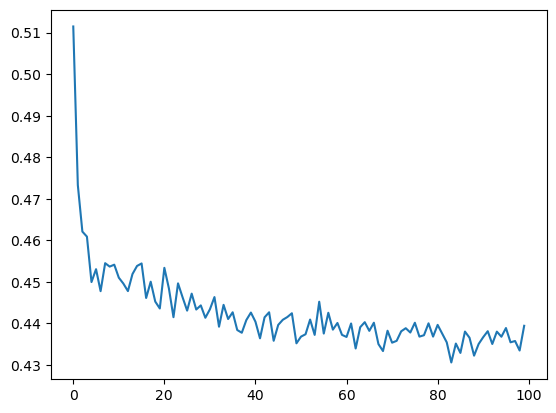

In [28]:
plt.plot(losses);

In [29]:
model.inp.weight

Parameter containing:
tensor([[ 0.5256],
        [-0.2230],
        [-0.0822]], requires_grad=True)

In [34]:
X.shape

torch.Size([500, 1])

In [38]:
model.inp.weight

Parameter containing:
tensor([[ 0.5256],
        [-0.2230],
        [-0.0822]], requires_grad=True)

In [39]:
X*model.inp.weight[0]

tensor([[-5.2564],
        [-5.2354],
        [-5.2143],
        [-5.1932],
        [-5.1722],
        [-5.1511],
        [-5.1300],
        [-5.1090],
        [-5.0879],
        [-5.0668],
        [-5.0457],
        [-5.0247],
        [-5.0036],
        [-4.9825],
        [-4.9615],
        [-4.9404],
        [-4.9193],
        [-4.8983],
        [-4.8772],
        [-4.8561],
        [-4.8351],
        [-4.8140],
        [-4.7929],
        [-4.7719],
        [-4.7508],
        [-4.7297],
        [-4.7087],
        [-4.6876],
        [-4.6665],
        [-4.6455],
        [-4.6244],
        [-4.6033],
        [-4.5823],
        [-4.5612],
        [-4.5401],
        [-4.5191],
        [-4.4980],
        [-4.4769],
        [-4.4558],
        [-4.4348],
        [-4.4137],
        [-4.3926],
        [-4.3716],
        [-4.3505],
        [-4.3294],
        [-4.3084],
        [-4.2873],
        [-4.2662],
        [-4.2452],
        [-4.2241],
        [-4.2030],
        [-4.1820],
        [-4.

In [32]:
plt.plot(X, X@model.inp.weight)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (500x1 and 3x1)

In [54]:
model.out.weight[0][0]

tensor(0.0514, grad_fn=<SelectBackward0>)

In [59]:
rf"$l1 = X \cdot {3}$"

'$l1 = X \\cdot 3$'

In [73]:
str(model.inp.weight[0].detach().numpy()[0])

'0.52564275'

In [81]:
model.out.weight[0][0].detach().numpy()

array(0.05137775, dtype=float32)

In [83]:
model.out.bias

Parameter containing:
tensor([0.0136], requires_grad=True)

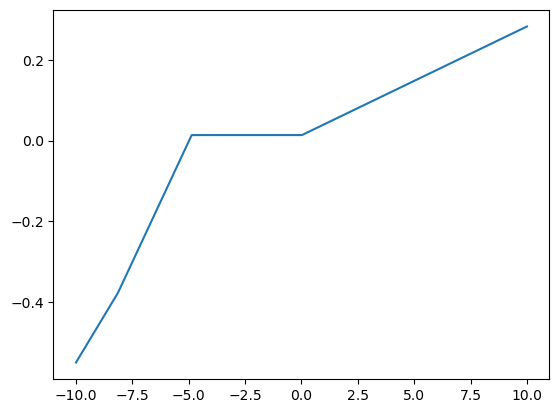

In [88]:
plt.plot(X, model(X).detach())

In [130]:
model.inp.weight.reshape(1,3).shape

torch.Size([1, 3])

In [132]:
model.inp.weight.reshape(-1,1).shape

torch.Size([3, 1])

In [134]:
model.inp.weight.shape

torch.Size([3, 1])

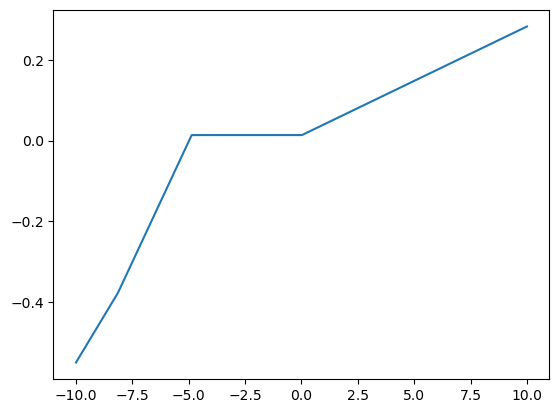

In [142]:
plt.plot(X, model(X).detach())

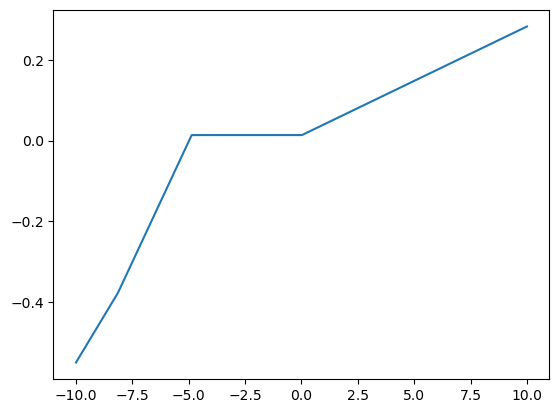

In [143]:
plt.plot(X, (F.relu(X@model.inp.weight.reshape(1,3) + model.inp.bias)@model.out.weight.reshape(-1,1) + model.out.bias).detach().numpy())

In [137]:
F.relu(X@model.inp.weight.reshape(1,3))@model.out.weight.reshape(-1,1)

tensor([[-9.2944e-01],
        [-9.2571e-01],
        [-9.2199e-01],
        [-9.1826e-01],
        [-9.1454e-01],
        [-9.1081e-01],
        [-9.0709e-01],
        [-9.0336e-01],
        [-8.9964e-01],
        [-8.9591e-01],
        [-8.9218e-01],
        [-8.8846e-01],
        [-8.8473e-01],
        [-8.8101e-01],
        [-8.7728e-01],
        [-8.7356e-01],
        [-8.6983e-01],
        [-8.6611e-01],
        [-8.6238e-01],
        [-8.5866e-01],
        [-8.5493e-01],
        [-8.5121e-01],
        [-8.4748e-01],
        [-8.4376e-01],
        [-8.4003e-01],
        [-8.3631e-01],
        [-8.3258e-01],
        [-8.2886e-01],
        [-8.2513e-01],
        [-8.2141e-01],
        [-8.1768e-01],
        [-8.1396e-01],
        [-8.1023e-01],
        [-8.0651e-01],
        [-8.0278e-01],
        [-7.9905e-01],
        [-7.9533e-01],
        [-7.9160e-01],
        [-7.8788e-01],
        [-7.8415e-01],
        [-7.8043e-01],
        [-7.7670e-01],
        [-7.7298e-01],
        [-7

In [89]:
model.inp.bias

Parameter containing:
tensor([-0.0097, -1.0866, -0.6696], requires_grad=True)

In [90]:
model.out.bias

Parameter containing:
tensor([0.0136], requires_grad=True)

In [104]:
X.shape

torch.Size([500, 1])

In [106]:
model.inp.weight.detach().reshape(1,3)

tensor([[ 0.5256, -0.2230, -0.0822]])

In [112]:
X.shape

torch.Size([500, 1])

In [111]:
model.inp.weight.shape

torch.Size([3, 1])

In [197]:
model.out.bias

Parameter containing:
tensor([0.0136], requires_grad=True)

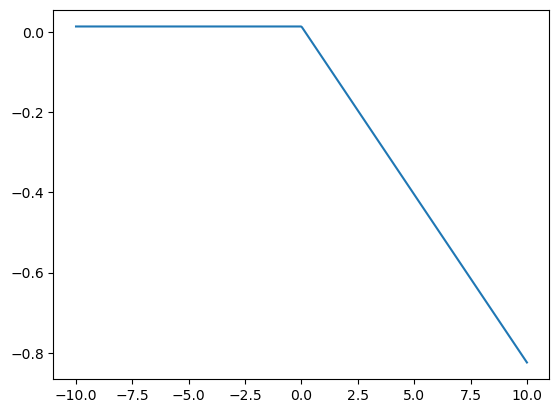

In [153]:
plt.plot(X, (F.relu(X@model.inp.weight[0].detach())*model.out.weight[0][0].detach() + F.relu(X@model.inp.weight[0].detach())*model.out.weight[0][1].detach() + F.relu(X@model.inp.weight[0].detach())*model.out.weight[0][2].detach() + model.out.bias).detach())

In [149]:
F.relu(X@model.inp.weight[0].detach())*model.out.weight[0][0].detach() + F.relu(X@model.inp.weight[0].detach())*model.out.weight[0][1].detach() + F.relu(X@model.inp.weight[0].detach())*model.out.weight[0][2].detach() + model.out.bias

tensor([ 0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,
         0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,
         0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,
         0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,
         0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,
         0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,
         0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,
         0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,
         0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,
         0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,
         0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,
         0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,  0.0136,
         0.0136,  0.0136,  0.0136,  0.01

In [196]:
model.out.bias

Parameter containing:
tensor([0.0136], requires_grad=True)

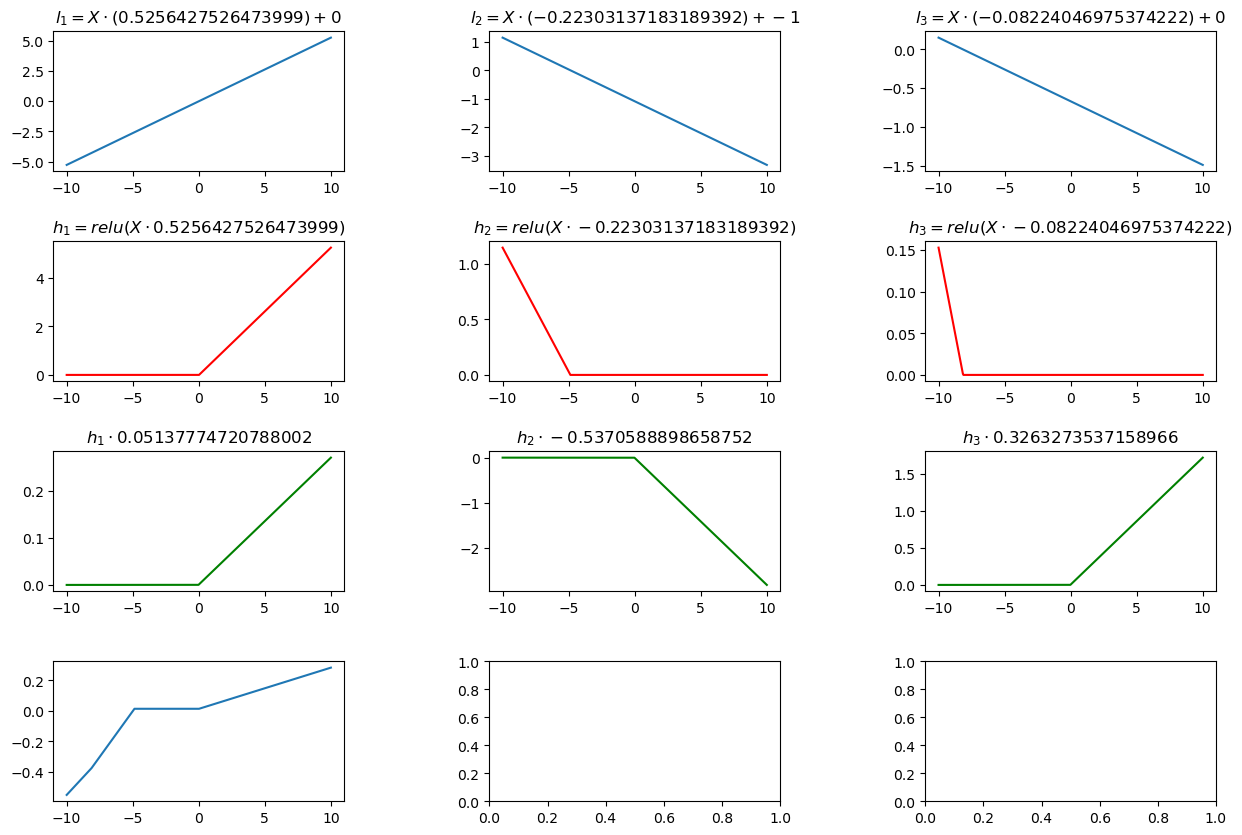

In [198]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
axs[0,0].set_title(rf"$l_1 = X \cdot ({model.inp.weight[0].detach().numpy()[0]}) + {int(model.inp.bias[0].detach().numpy())}$")
axs[0,0].plot(X, X*model.inp.weight[0].detach() + model.inp.bias[0].detach())

axs[0,1].set_title(rf"$l_2 = X \cdot ({model.inp.weight[1].detach().numpy()[0]}) + {int(model.inp.bias[1].detach().numpy())}$")
axs[0,1].plot(X, X@model.inp.weight[1].detach() + model.inp.bias[1].detach())

axs[0,2].set_title(rf"$l_3 = X \cdot ({model.inp.weight[2].detach().numpy()[0]}) + {int(model.inp.bias[2].detach().numpy())}$")
axs[0,2].plot(X, X@model.inp.weight[2].detach() + model.inp.bias[2].detach())

axs[1,0].set_title(rf"$h_1 = relu(X \cdot {model.inp.weight[0].detach().numpy()[0]})$")
axs[1,0].plot(X, F.relu(X@model.inp.weight[0].detach() + model.inp.bias[0].detach()), color="red")

axs[1,1].set_title(rf"$h_2 = relu(X \cdot {model.inp.weight[1].detach().numpy()[0]})$")
axs[1,1].plot(X, F.relu(X@model.inp.weight[1].detach() + model.inp.bias[1].detach()), color="red")

axs[1,2].set_title(rf"$h_3 = relu(X \cdot {model.inp.weight[2].detach().numpy()[0]})$")
axs[1,2].plot(X, F.relu(X@model.inp.weight[2].detach() + model.inp.bias[2].detach()), color="red")

axs[2,0].set_title(rf"$h_1 \cdot {model.out.weight[0][0].detach().numpy()}$")
axs[2,0].plot(X, F.relu(X@model.inp.weight[0] + model.out.bias).detach()*model.out.weight[0][0].detach(), color="green")

axs[2,1].set_title(rf"$h_2 \cdot {model.out.weight[0][1].detach().numpy()}$")
axs[2,1].plot(X, F.relu(X@model.inp.weight[0] + model.out.bias).detach()*model.out.weight[0][1].detach(), color="green")

axs[2,2].set_title(rf"$h_3 \cdot {model.out.weight[0][2].detach().numpy()}$")
axs[2,2].plot(X, F.relu(X@model.inp.weight[0] + model.out.bias).detach()*model.out.weight[0][2].detach(), color="green")


axs[3,0].plot(X,  (F.relu(X@model.inp.weight.reshape(1,3) + model.inp.bias)@model.out.weight.reshape(-1,1) + model.out.bias).detach().numpy())

In [194]:
model.inp.bias

Parameter containing:
tensor([-0.0097, -1.0866, -0.6696], requires_grad=True)

In [157]:
np.dot(X, model.inp.weight.reshape(1,3).detach()).shape

(500, 3)

In [160]:
np.dot(X, model.inp.weight.reshape(1,3).detach())[:,0]

array([-5.256428  , -5.2353597 , -5.214292  , -5.193224  , -5.1721563 ,
       -5.1510887 , -5.13002   , -5.1089525 , -5.0878844 , -5.066817  ,
       -5.045749  , -5.024681  , -5.0036135 , -4.982546  , -4.9614778 ,
       -4.94041   , -4.9193416 , -4.898274  , -4.8772063 , -4.856138  ,
       -4.8350706 , -4.814003  , -4.792935  , -4.7718673 , -4.750799  ,
       -4.7297316 , -4.708664  , -4.6875954 , -4.6665277 , -4.6454597 ,
       -4.624392  , -4.6033244 , -4.5822563 , -4.5611887 , -4.540121  ,
       -4.519053  , -4.4979854 , -4.4769173 , -4.455849  , -4.4347816 ,
       -4.4137135 , -4.392646  , -4.371578  , -4.35051   , -4.3294425 ,
       -4.3083744 , -4.287307  , -4.266239  , -4.245171  , -4.224103  ,
       -4.203035  , -4.1819673 , -4.1608996 , -4.1398315 , -4.118764  ,
       -4.0976963 , -4.076628  , -4.0555606 , -4.0344925 , -4.013425  ,
       -3.9923568 , -3.971289  , -3.950221  , -3.9291532 , -3.9080853 ,
       -3.8870177 , -3.8659499 , -3.844882  , -3.823814  , -3.80

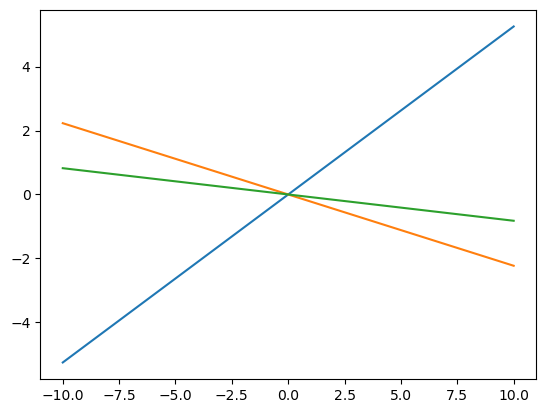

In [168]:
plt.plot(X, np.dot(X, model.inp.weight.reshape(1,3).detach()))

In [175]:
F.relu(X@model.inp.weight.reshape(1,3)).detach()

tensor([[0.0000, 2.2303, 0.8224],
        [0.0000, 2.2214, 0.8191],
        [0.0000, 2.2124, 0.8158],
        ...,
        [5.2143, 0.0000, 0.0000],
        [5.2354, 0.0000, 0.0000],
        [5.2564, 0.0000, 0.0000]])

In [178]:
F.relu(X@model.inp.weight.reshape(1,3)).detach().numpy().shape

(500, 3)

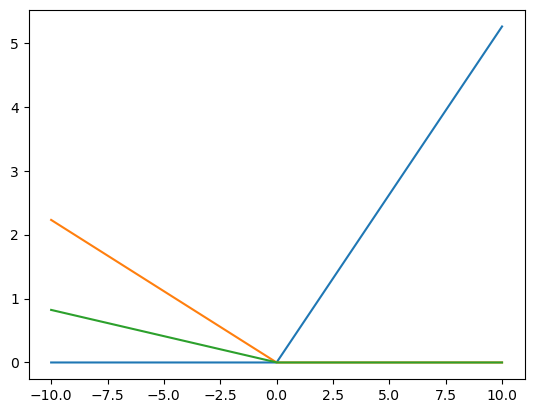

In [177]:
plt.plot(X, F.relu(X@model.inp.weight.reshape(1,3)).detach().numpy())

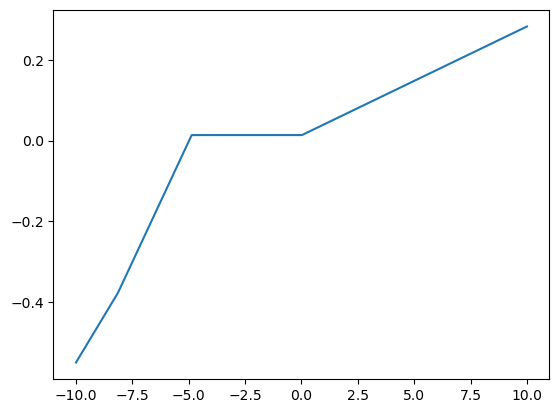

In [186]:
plt.plot(X, (F.relu(X@model.inp.weight.reshape(1,3) + model.inp.bias)@model.out.weight.reshape(-1,1) + model.out.bias).detach())

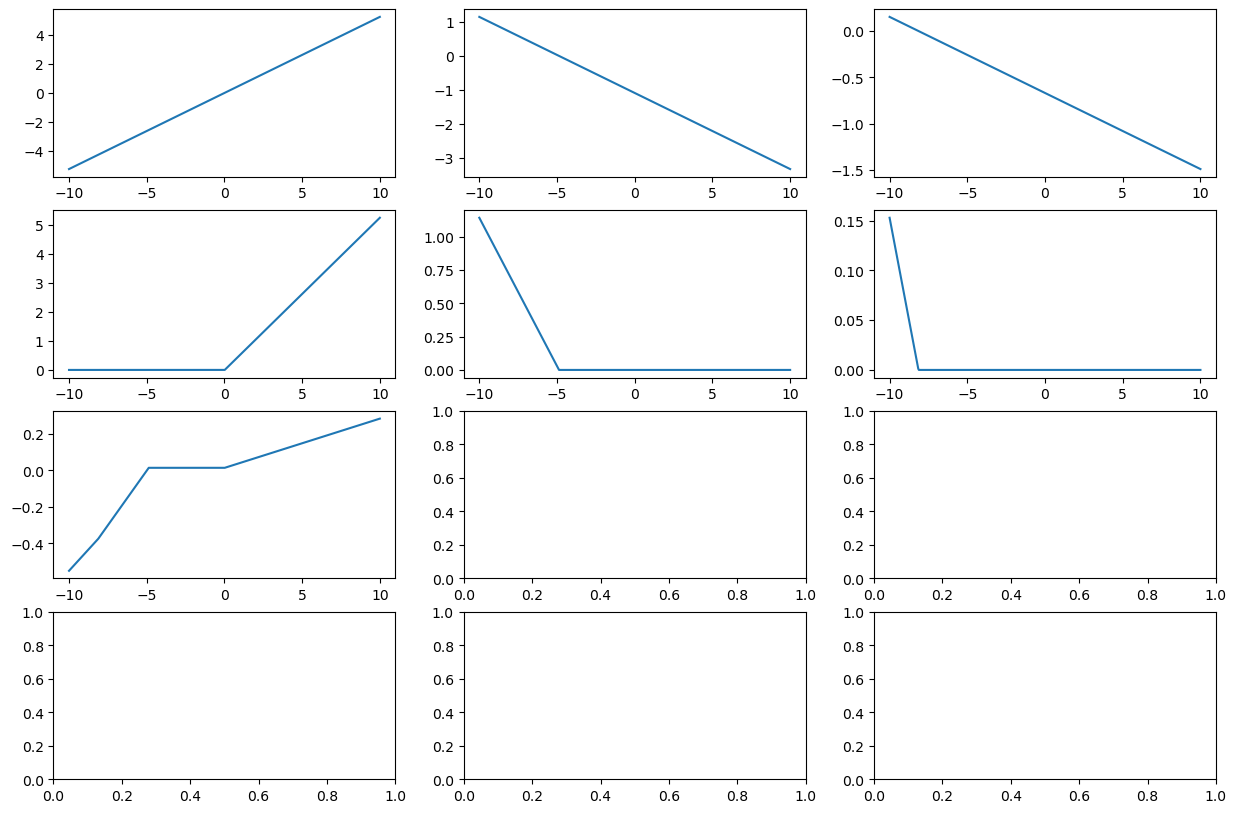

In [192]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,10))
# np.dot(X, model.inp.weight.reshape(1,3).detach())
axs[0,0].plot(X, (X@model.inp.weight.reshape(1,3) + model.inp.bias).detach()[:,0])
axs[0,1].plot(X, (X@model.inp.weight.reshape(1,3) + model.inp.bias).detach()[:,1])
axs[0,2].plot(X, (X@model.inp.weight.reshape(1,3) + model.inp.bias).detach()[:,2])


# F.relu(X@model.inp.weight.reshape(1,3)).detach().numpy()
axs[1,0].plot(X, F.relu(X@model.inp.weight.reshape(1,3)+ model.inp.bias).detach().numpy()[:,0])
axs[1,1].plot(X, F.relu(X@model.inp.weight.reshape(1,3)+ model.inp.bias).detach().numpy()[:,1])
axs[1,2].plot(X, F.relu(X@model.inp.weight.reshape(1,3)+ model.inp.bias).detach().numpy()[:,2])


axs[2,0].plot(X, (F.relu(X@model.inp.weight.reshape(1,3) + model.inp.bias)@model.out.weight.reshape(-1,1) + model.out.bias).detach())

In [199]:
from manim import *

Manim Community v0.18.0

In [233]:
model.inp.weight.reshape(1,3)

tensor([[ 0.5256, -0.2230, -0.0822]], grad_fn=<ViewBackward0>)

In [234]:
model.inp.bias

Parameter containing:
tensor([-0.0097, -1.0866, -0.6696], requires_grad=True)

In [274]:
model.out.bias

Parameter containing:
tensor([0.0136], requires_grad=True)

In [282]:
model.out.weight[0][0].detach()

tensor(0.0514)

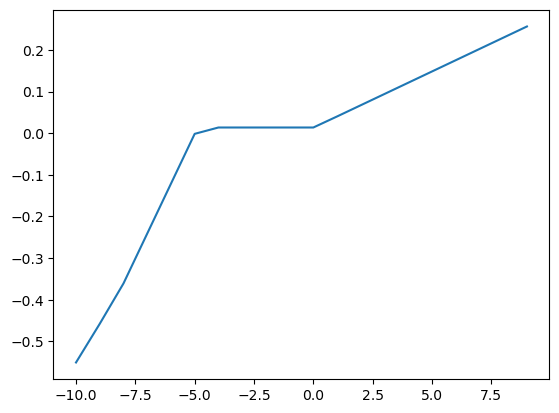

In [286]:
plt.plot(np.arange(-10,10,1), 0.0514*np.maximum(0,0.5256*np.arange(-10,10, 1)-0.0097) + -0.5371*np.maximum(0,-0.2230*np.arange(-10,10, 1)-1.0866) + 0.3263*np.maximum(0,-0.0822*np.arange(-10,10, 1)-0.6696) + 0.0136)

In [284]:
0.0514*np.maximum(0,0.5256*np.arange(-10,10, 1)-0.0097) + -0.5371*np.maximum(0,-0.2230*np.arange(-10,10, 1)-1.0866) + 0.3263*np.maximum(0,-0.0822*np.arange(-10,10, 1)-0.6696) + 0.0136

array([-0.55079202, -0.45784058, -0.36097354, -0.24120024, -0.12142694,
       -0.00165364,  0.0136    ,  0.0136    ,  0.0136    ,  0.0136    ,
        0.0136    ,  0.04011726,  0.0671331 ,  0.09414894,  0.12116478,
        0.14818062,  0.17519646,  0.2022123 ,  0.22922814,  0.25624398])

In [291]:
%%manim -qm -v WARNING Short

class Short(Scene):
    CONFIG = {
            "axes_kwargs" : {
                "x_range" : (-5,5,2),
                "y_range" : (-10,10,5),
                "axis_config" : {
                    "stroke_color" : PINK,
                    "stroke_width" : 4 },
                "y_axis_config" : {"include_tip":False} 
            }
    } 
    CONFIG_2 = {
            "axes_kwargs" : {
                "x_range" : (-5,5,2),
                "y_range" : (-1,10,5),
                "axis_config" : {
                    "stroke_color" : PINK,
                    "stroke_width" : 4 },
                "y_axis_config" : {"include_tip":False} 
            }
    } 

    CONFIG_3 = {
            "axes_kwargs" : {
                "x_range" : (-5,5,2),
                "y_range" : (-2,4,5),
                "axis_config" : {
                    "stroke_color" : PINK,
                    "stroke_width" : 4 },
                "y_axis_config" : {"include_tip":False} 
            }
    } 

    CONFIG_4 = {
            "axes_kwargs" : {
                "x_range" : (-10,10, 5),
                "y_range" : (-0.6,0.2,5),
                "axis_config" : {
                    "stroke_color" : PINK,
                    "stroke_width" : 4 },
                "y_axis_config" : {"include_tip":False} 
            }
    } 
    
    def construct(self):

        name = Text("@pablocpz.ai", slant=ITALIC,
                   font_size=20,
                   color=BLUE).to_corner(DR)
        self.add(name)
        text = Text("Example of how neural network make \n piecewise-linear regions", font_size=35, color="red",
                   t2c={"piecewise":RED}).shift(UP)

        self.play(Create(text))
        self.wait(1)

        eq = MathTex(r"f(x) = \omega_1 \cdot h_1 + \omega_2 \cdot h_2 + \omega_3 \cdot h_3 + \omega_0",
                    substrings_to_isolate=["x", "\omega_0", "\omega_1", "\omega_2", "\omega_3"])
        eq.set_color_by_tex("\omega_0", GREEN_A)
        eq.set_color_by_tex("\omega_1", RED)
        eq.set_color_by_tex("\omega_1", YELLOW)
        eq.set_color_by_tex("\omega_2", PINK)
        eq.set_color_by_tex("\omega_3", BLUE)
        eq.set_color_by_tex("x", GOLD_A)

        self.play(Create(eq))

        self.wait(1)
        eq_simp1 = MathTex(r"= \omega_1 \cdot relu(l_1) + \omega_2 \cdot relu(l_2) + \omega_3 \cdot relu(l_3) + \omega_0",
                    substrings_to_isolate=["relu","x", "\omega_0", "\omega_1", "\omega_2", "\omega_3"]).next_to(eq, DOWN)
        eq_simp1.set_color_by_tex("\omega_0", GREEN_A)
        eq_simp1.set_color_by_tex("\omega_1", RED)
        eq_simp1.set_color_by_tex("\omega_1", YELLOW)
        eq_simp1.set_color_by_tex("\omega_2", PINK)
        eq_simp1.set_color_by_tex("\omega_3", BLUE)
        eq_simp1.set_color_by_tex("relu", PURE_GREEN)
        eq_simp1.set_color_by_tex("x", GOLD_A)
        
        self.play(FadeIn(eq_simp1))

        self.wait(0.5)

       
        eq_simp2 = MathTex(r"f(x) = \omega_1 (relu(\theta_1 \cdot x + \theta_0)) + \omega_2 (relu(\theta_2 \cdot x + \theta_3)) \
         + \omega_3 (relu(\theta_4 \cdot x + \theta_5))", font_size=30,
                    substrings_to_isolate=["x", "\omega_0", "\omega_1", "\omega_2", "\omega_3",
                                          "relu"]).scale(1.3).next_to(eq_simp1, DOWN)
        eq_simp2.set_color_by_tex("\omega_0", GREEN_A)
        eq_simp2.set_color_by_tex("\omega_1", RED)
        eq_simp2.set_color_by_tex("\omega_1", YELLOW)
        eq_simp2.set_color_by_tex("\omega_2", PINK)
        eq_simp2.set_color_by_tex("\omega_3", BLUE)
        eq_simp2.set_color_by_tex("relu", PURE_GREEN)
        eq_simp2.set_color_by_tex("x", GOLD_A)

        self.play(FadeTransform(text,eq_simp2))
        # self.add(eq)
        self.wait(1)
        
        self.play(FadeOut(Group(*self.mobjects)))

        text = Text("Hence, we have 3 linear equations:")
        self.add(text)
        linear_eq = MathTex(r"l_i = \theta_j \cdot x + \theta_k").next_to(text, DOWN)
        self.play(Create(linear_eq))
        self.wait(1)
        self.play(FadeOut(text, linear_eq))

        axes = Axes(**self.CONFIG["axes_kwargs"]).scale(0.7)
        axes.add_coordinates(font_size=30, num_decimal_places=1)
        self.add(axes)

        self.wait(0.5)

        l_1 = axes.plot_line_graph(x_values=np.arange(-10,10, 1), y_values=(0.5256*np.arange(-10,10, 1)-0.0097),
                                  line_color=TEAL_A, add_vertex_dots=False).scale(0.7)
        
        eq_l1 = MathTex(r"l_1 = 0,5256 x -0,0097",
                       color=TEAL_A).to_corner(UL)
        
        l_2 = axes.plot_line_graph(x_values=np.arange(-10,10, 1), y_values=(-0.2230*np.arange(-10,10, 1)-1.0866),
                                  line_color=RED_B, add_vertex_dots=False).scale(0.7)

        
        eq_l2 = MathTex(r"l_2 = -0,2230 x -1,0866",
                       color=RED_B).next_to(eq_l1, DOWN)
        
        l_3 = axes.plot_line_graph(x_values=np.arange(-10,10, 1),
                                   y_values=(-0.0822*np.arange(-10,10, 1)-0.6696),
                                  line_color=YELLOW_C, add_vertex_dots=False).scale(0.7)
        
        eq_l3 = MathTex(r"l_3 = -0,0822 x -0,6696",
                       color=YELLOW_C).next_to(eq_l2, DOWN)

        self.play(Create(eq_l1))
        self.play(FadeIn(eq_l2))
        self.play(Create(eq_l3))
        self.play(FadeIn(l_1, l_2, l_3))
        self.wait(2)
        self.play(FadeOut(Group(*self.mobjects)))
        t = Text("Then, we apply a non-linear \n function to each line",
                t2c={"non-linear":PURE_GREEN}, font_size=40).to_corner(UR)
        
        self.add(t)
        axes = Axes(**self.CONFIG_2["axes_kwargs"]).scale(0.7)
        axes.add_coordinates(font_size=30, num_decimal_places=1)
        self.add(axes)
        
        
        self.wait(0.5)
        h_1 = axes.plot_line_graph(x_values=np.arange(-10,10, 1), y_values=np.maximum(0, 0.5256*np.arange(-10,10, 1)-0.0097),
                                  line_color=TEAL_A, add_vertex_dots=False).scale(0.7)
        h_2 = axes.plot_line_graph(x_values=np.arange(-10,10, 1), y_values=np.maximum(0,-0.2230*np.arange(-10,10, 1)-1.0866),
                                  line_color=RED_B, add_vertex_dots=False).scale(0.7)
        h_3 = axes.plot_line_graph(x_values=np.arange(-10,10, 1),
                                   y_values=np.maximum(0,-0.0822*np.arange(-10,10, 1)-0.6696),
                                  line_color=LIGHT_PINK, add_vertex_dots=False).scale(0.7)
        
        # self.play(FadeOut(l_1, l_2, l_3))
        self.play(FadeIn(h_1, h_2, h_3))
        self.wait(2)

        tt = Text("Having these functions, we weight \n each one",
                 t2c={"weight":YELLOW}, font_size=40).to_corner(UL)
        self.play(ReplacementTransform(t, tt))
        self.wait(0.5)
        
        self.play(FadeOut(Group(*self.mobjects)))
        axes = Axes(**self.CONFIG_3["axes_kwargs"]).scale(0.7)
        axes.add_coordinates(font_size=30, num_decimal_places=1)
        self.add(axes)

        o_1 = axes.plot_line_graph(x_values=np.arange(-10,10, 1), y_values=0.0514*np.maximum(0,0.5256*np.arange(-10,10, 1)-0.0097),
                                  line_color=TEAL_A, add_vertex_dots=False).scale(0.7)
        o_2 = axes.plot_line_graph(x_values=np.arange(-10,10, 1), y_values=-0.5371*np.maximum(0,-0.2230*np.arange(-10,10, 1)-1.0866),
                                  line_color=RED_B, add_vertex_dots=False).scale(0.7)
        o_3 = axes.plot_line_graph(x_values=np.arange(-10,10, 1),
                                   y_values=0.3263*np.maximum(0,-0.0822*np.arange(-10,10, 1)-0.6696),
                                  line_color=LIGHT_PINK, add_vertex_dots=False).scale(0.7)
        # self.add(eq_simp2.next_to(tt, DOWN))
        self.play(FadeIn(o_1, o_2, o_3))
        # self.play(FadeIn(t))
        self.wait(1)

        text = Text("Finally, we sum each function \n and add up a bias",font_size=35).to_corner(UL)
        self.wait(0.5)
        self.play(FadeOut(Group(*self.mobjects)))

        axes = Axes(**self.CONFIG_4["axes_kwargs"]).scale(0.7)
        axes.add_coordinates(font_size=30, num_decimal_places=1)
        self.add(axes)

        pred =  axes.plot_line_graph(x_values=np.arange(-10,10, 1),
                                     y_values=(0.0514*np.maximum(0,0.5256*np.arange(-10,10, 1)-0.0097) + -0.5371*np.maximum(0,-0.2230*np.arange(-10,10, 1)-1.0866) + 0.3263*np.maximum(0,-0.0822*np.arange(-10,10, 1)-0.6696) + 0.0136),
                                  line_color=PURE_GREEN, add_vertex_dots=False).scale(0.7)
        eq = eq_simp2.copy()
        eq.shift(UP*3)
        self.play(Create(eq))
        self.play(FadeIn(pred))
        self.wait(0.5)
        self.play(ReplacementTransform(eq, eq_simp1.move_to(DOWN*2)))
        self.wait(12)
        
        



Animation 0: Create(Text('Example of how neural network make \n piecewise-linear regions')):   0%| | 0/30 [00:00<?, ?it

Animation 0: Create(Text('Example of how neural network make \n piecewise-linear regions')):  23%|2| 7/30 [00:00<00:00,

Animation 0: Create(Text('Example of how neural network make \n piecewise-linear regions')):  47%|4| 14/30 [00:00<00:00

Animation 0: Create(Text('Example of how neural network make \n piecewise-linear regions')):  70%|7| 21/30 [00:00<00:00

Animation 0: Create(Text('Example of how neural network make \n piecewise-linear regions')):  90%|9| 27/30 [00:00<00:00

                                                                                                                       

Animation 2: Create(MathTex('f( x ) =  \\omega_1  \\cdot h_1 +  \\omega_2  \\cdot h_2 +  \\omega_3  \\cdot h_3 +  \\ome

Animation 2: Create(MathTex('f( x ) =  \\omega_1  \\cdot h_1 +  \\omega_2  \\cdot h_2 +  \\omega_3  \\cdot h_3 +  \\ome

Animation 2: Create(MathTex('f

In [148]:
(F.relu(X@model.inp.weight.reshape(1,3) + model.inp.bias)@model.out.weight.reshape(-1,1) + model.out.bias).shape

torch.Size([500, 1])

In [ ]:
F.relu(X@model.inp.weight.reshape(1,3) + model.inp.bias)